In [19]:
#!pip install cython --user

  Using cached https://files.pythonhosted.org/packages/9e/cc/60984d76cde8cb76d7a897fc0dfb316c6c2f8c753cdf468a9d5773376b84/Cython-0.29.16-cp36-cp36m-manylinux1_x86_64.whl
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
#!pip install pycocotools --user

  Using cached https://files.pythonhosted.org/packages/96/84/9a07b1095fd8555ba3f3d519517c8743c2554a245f9476e5e39869f948d2/pycocotools-2.0.0.tar.gz
  Running setup.py bdist_wheel for pycocotools ... done
  Stored in directory: /nfs/home/hama2386/.cache/pip/wheels/dc/e6/36/0e1ae88c868eb42d3f92181b1c9bbd0b217a7ec3da6bd62e55
Successfully built pycocotools
You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import torchvision.datasets as dataset

DATAPATH_TRAIN = "coco_dataset/train2017"
DATAPATH_TR_JSON = "coco_dataset/annotations/instances_train2017.json"

coco_train = dataset.CocoDetection(root = DATAPATH_TRAIN,annFile = DATAPATH_TR_JSON)

loading annotations into memory...
Done (t=13.04s)
creating index...
index created!


In [2]:
print('Number of samples: ', len(coco_train))

Number of samples:  118287


[53.01, 356.49, 132.03, 55.19]


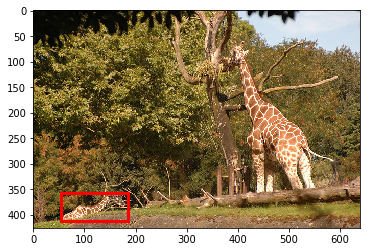

[{'segmentation': [[437.52, 353.33, 437.87, 326.98, 433.65, 306.26, 427.33, 287.29, 427.33, 279.56, 424.52, 266.21, 417.85, 255.68, 417.49, 248.65, 428.38, 234.95, 429.09, 223.71, 426.28, 211.77, 416.44, 192.45, 415.74, 191.05, 414.33, 182.27, 414.68, 180.51, 413.98, 170.32, 412.58, 168.22, 411.87, 165.41, 410.82, 149.6, 405.9, 121.15, 400.28, 107.45, 392.56, 108.85, 386.58, 101.13, 385.88, 99.72, 385.53, 92.7, 386.58, 88.48, 385.88, 84.62, 386.94, 81.1, 392.91, 68.11, 395.01, 60.03, 396.07, 60.03, 398.88, 65.65, 398.53, 68.46, 399.58, 70.57, 404.5, 68.81, 408.01, 61.79, 408.71, 61.08, 413.28, 62.84, 409.77, 73.38, 409.77, 77.24, 414.33, 81.81, 418.55, 80.75, 424.17, 77.59, 424.52, 80.4, 418.9, 86.72, 413.98, 93.05, 432.25, 127.82, 442.78, 157.68, 453.32, 172.43, 465.62, 179.46, 482.48, 198.42, 497.23, 214.23, 519.71, 226.17, 535.87, 251.81, 542.19, 268.67, 543.59, 272.89, 562.21, 285.18, 590.31, 293.96, 599.44, 297.12, 600.5, 321.01, 589.26, 318.9, 585.74, 313.98, 582.93, 304.5, 578.7

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

img, target = coco_train[1]
bbox = target[1]["bbox"]
print(bbox)
plt.imshow(img)
ax = plt.gca()
rect = Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=3,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()
print(target)

In [4]:
data = coco_train[0]
print(data)
print()
print(data[0])
print()
print(data[1])

(<PIL.Image.Image image mode=RGB size=640x480 at 0x7F1C4F811390>, [{'segmentation': [[500.49, 473.53, 599.73, 419.6, 612.67, 375.37, 608.36, 354.88, 528.54, 269.66, 457.35, 201.71, 420.67, 187.69, 389.39, 192.0, 19.42, 360.27, 1.08, 389.39, 2.16, 427.15, 20.49, 473.53]], 'area': 120057.13925, 'iscrowd': 0, 'image_id': 9, 'bbox': [1.08, 187.69, 611.59, 285.84], 'category_id': 51, 'id': 1038967}, {'segmentation': [[357.03, 69.03, 311.73, 15.1, 550.11, 4.31, 631.01, 62.56, 629.93, 88.45, 595.42, 185.53, 513.44, 230.83, 488.63, 232.99, 437.93, 190.92, 429.3, 189.84, 434.7, 148.85, 410.97, 121.89, 359.19, 74.43, 358.11, 65.8]], 'area': 44434.751099999994, 'iscrowd': 0, 'image_id': 9, 'bbox': [311.73, 4.31, 319.28, 228.68], 'category_id': 51, 'id': 1039564}, {'segmentation': [[249.6, 348.99, 267.67, 311.72, 291.39, 294.78, 304.94, 294.78, 326.4, 283.48, 345.6, 273.32, 368.19, 269.93, 385.13, 268.8, 388.52, 257.51, 393.04, 250.73, 407.72, 240.56, 425.79, 230.4, 441.6, 229.27, 447.25, 237.18, 

In [5]:
640*480

307200

In [ ]:
from tqdm import tqdm

area_dist = []

for img,target in tqdm(coco_train):
    for obj in target:
        area_dist.append(obj["area"])

  2%|▏         | 2904/118287 [00:35<23:06, 83.19it/s] 

In [ ]:
plt.hist(area_dist, bins=100, range=(min(area_dist),307200))
plt.show()

In [ ]:
print(max(area_dist))

In [ ]:
len(area_dist)

In [ ]:
area_dist.sort()
area_dist[len(area_dist)//10]

In [ ]:
import numpy as np

np.sqrt(np.mean(area_dist))

In [ ]:
img

In [ ]:
np_img = np.array(img)
plt.imshow(np_img)
plt.show()
print(np_img)

In [ ]:
from skimage.transform import resize
from skimage import img_as_ubyte, img_as_bool
#640(col),480(row)

def sqrBoundingBox(img,bbox,ratio=1):
    #PADDING = 50
    
    larger = 1/ratio - 1
    
    ROW_LOWER_BOUND = 0
    ROW_UPPER_BOUND = img.shape[0]
    COL_LOWER_BOUND = 0
    COL_UPPER_BOUND = img.shape[1]
    
    minr = max(bbox[1] - (bbox[1]*larger)//2 , 0)
    maxr = min(bbox[1]+bbox[3] + ((bbox[1]+bbox[3])*larger)//2 , 480)
    minc = max(bbox[0] - (bbox[0]*larger)//2 , 0)
    maxc = min(bbox[0]+bbox[2] + ((bbox[0]+bbox[2])*larger)//2 , 640)
    
    bbox_row_length = maxr-minr
    bbox_col_length = maxc-minc
    
    if bbox_row_length < bbox_col_length:
        more = (bbox_col_length - bbox_row_length)//2
        minr = minr - more
        maxr = maxr + more
    else:
        more = (bbox_row_length - bbox_col_length)//2
        minc = minc - more
        maxc = maxc + more
    
    if maxr-minr > ROW_UPPER_BOUND:
        minr = 0
        maxr = ROW_UPPER_BOUND
    else:
        if minr < ROW_LOWER_BOUND:
            maxr = maxr + abs(minr)
            minr = ROW_LOWER_BOUND
        
        if maxr > ROW_UPPER_BOUND:
            minr = minr - abs(maxr-ROW_UPPER_BOUND)
            maxr = ROW_UPPER_BOUND
        
    if maxc-minc > COL_UPPER_BOUND:
        minc = 0 
        maxc = COL_UPPER_BOUND
    else:
        if minc < COL_LOWER_BOUND:
            maxc = maxc + abs(minc)
            minc = COL_LOWER_BOUND
        if maxc > COL_UPPER_BOUND:
            minc = minc - abs(maxc-COL_UPPER_BOUND)
            maxc = COL_UPPER_BOUND
    

    minr = int(minr)
    maxr = int(maxr)
    minc = int(minc)
    maxc = int(maxc)
    return img[minr:maxr, minc:maxc]
    
        

In [ ]:

print(bbox)
#print(np_img)
plt.imshow(sqrBoundingBox(np_img,bbox,0.5))
plt.show()
plt.imshow(sqrBoundingBox(np_img,bbox,1))
plt.show()
plt.imshow(np_img[318:,53:185])
plt.show()
np_img.shape

In [ ]:
sqrBoundingBox(np_img,bbox,0.25)
sqrBoundingBox(np_img,bbox,0.5)
sqrBoundingBox(np_img,bbox,0.75)
sqrBoundingBox(np_img,bbox,1)

In [ ]:
def temp_func(img,target):
    
    for obj in target:
        

In [125]:
from multiprocessing import Pool

classes = []

pool 

for img,target in tqdm(coco_train):
    for obj in target:
        classes.append(obj["category_id"])

 57%|█████▋    | 67125/118287 [05:59<04:31, 188.42it/s]

KeyboardInterrupt: 

In [129]:
import os

os.mkdir("cropped_coco")

In [131]:
new_path = "cropped_coco"
dir_name = ["25","50","75","100"]
for name in dir_name:
    os.mkdir(os.path.join(new_path,name))

In [128]:
print(list(set(classes)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]


In [133]:
for name in dir_name:
    for category in list(set(classes)):
        os.mkdir(os.path.join(new_path,name,str(category)))

In [7]:
from PIL import Image
import os

def image_cutter(data):
    new_path = "cropped_coco/train"
    dir_name = ["25","50","75","100"]
    
    np_img = np.array(data[0])
    for obj in data[1]:
        bbox = obj["bbox"]
        obj_id = str(obj["id"])
        cat_id = str(obj["category_id"])
        cropped_img_100 = sqrBoundingBox(np_img,bbox,1)
        #cropped_img_75 = sqrBoundingBox(np_img,bbox,0.75)
        cropped_img_50 = sqrBoundingBox(np_img,bbox,0.5)
        #cropped_img_25 = sqrBoundingBox(np_img,bbox,0.25)
        
        #print(bbox,obj_id,cat_id)
        
        try:
            img1 = Image.fromarray(cropped_img_100)
        except:
            print("sad")
        #img2 = Image.fromarray(cropped_img_75)
        try:
            img3 = Image.fromarray(cropped_img_50)
        except:
            print("sad")
        #img4 = Image.fromarray(cropped_img_25)
        
        img1.save(os.path.join(new_path,"100",cat_id,obj_id+".png"))
        #img2.save(os.path.join(new_path,"75",cat_id,obj_id+".png"))
        img3.save(os.path.join(new_path,"50",cat_id,obj_id+".png"))
        #img4.save(os.path.join(new_path,"25",cat_id,obj_id+".png"))
        

        

In [153]:
image_cutter(coco_train[1])

In [ ]:
from multiprocessing import Pool
from tqdm import tqdm
import numpy as np

with Pool(processes=40) as p:
    with tqdm(total=len(coco_train)) as pbar:
        for i,_ in enumerate(p.imap_unordered(image_cutter,coco_train)):
            pbar.update()

## cropped_coco analysis

In [1]:
import os 

path = "cropped_coco/val/100"

file_list = os.listdir(path)
file_list.sort()

number_of_img = []

for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    number_of_img.append(len(img_list))

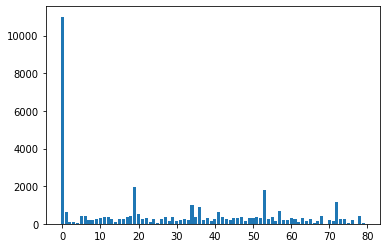

In [2]:
import matplotlib.pyplot as plt 

plt.bar(range(len(number_of_img)),number_of_img)
plt.show()

In [3]:
import numpy as np

np.array(number_of_img).mean()

459.7625

In [4]:
print(np.array(number_of_img).min())
print(np.array(number_of_img).max())

9
11004


In [5]:
import cv2
from tqdm import tqdm

path = "cropped_coco/val/100"

img_dim_arr = []

for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    temp = []
    for img_file in tqdm(img_list):
        img = cv2.imread(os.path.join(path,class_dir,img_file))
        temp.append(img.shape)
    img_dim_arr.append(temp)

100%|██████████| 57/57 [00:00<00:00, 1771.14it/s]


In [6]:
print(img_dim_arr[0][0])

(73, 72, 3)


In [7]:
img_mean_arr = []

for img_class in img_dim_arr:
    temp = []
    for imgs in tqdm(img_class):
        temp.append((imgs[0]+imgs[1])//2)
    img_mean_arr.append(temp)

100%|██████████| 57/57 [00:00<00:00, 206633.82it/s]


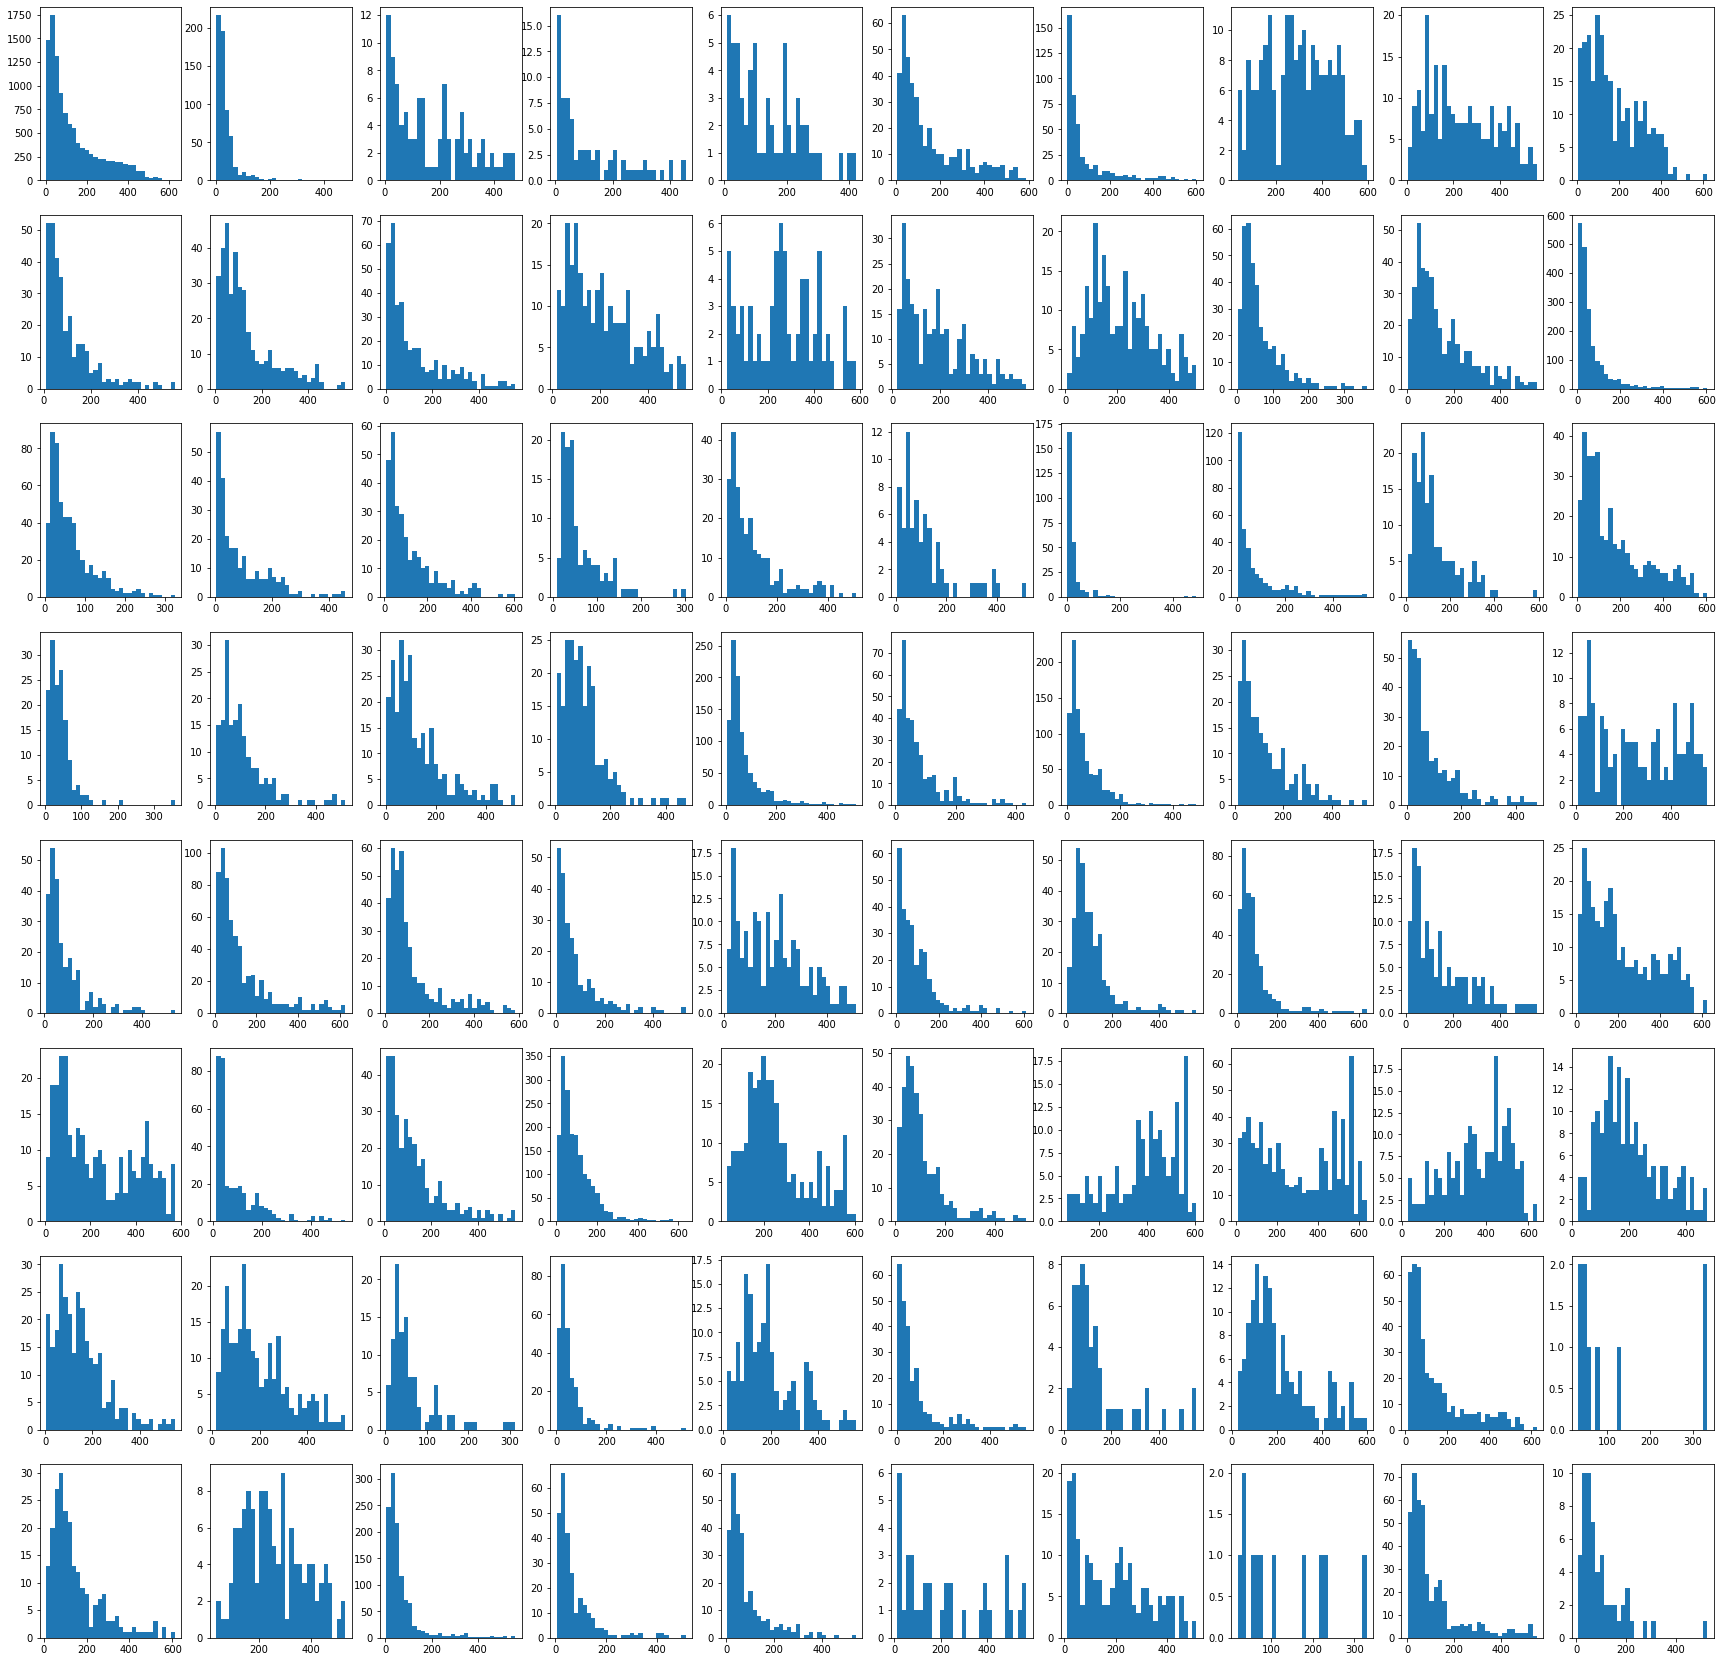

In [8]:
plt.figure(figsize=(30,30))
for i in range(1,81):
    plt.subplot(8,10,i)
    plt.hist(img_mean_arr[i-1],bins=30)
plt.show()

In [9]:
num=0
for i in img_mean_arr:
    dims = np.array(i)
    dims.sort()
    print(num,dims[int(len(dims)*0.20):])
    num = num+1

0 [ 30  30  30 ... 618 619 630]
1 [ 11  11  11  11  11  11  11  11  11  11  11  11  11  12  12  12  12  12
  12  12  12  12  12  12  13  13  13  13  13  13  13  13  13  13  13  13
  13  14  14  14  14  14  14  14  14  14  14  14  14  14  14  15  15  15
  15  15  15  15  15  15  15  15  15  15  15  15  16  16  16  16  16  16
  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16
  17  17  17  17  17  17  17  17  17  17  17  17  17  18  18  18  18  18
  18  18  18  18  18  18  18  18  18  18  18  19  19  19  19  19  19  19
  19  19  19  19  19  19  19  20  20  20  20  20  20  20  20  20  20  20
  20  20  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21  21
  22  22  22  22  22  22  22  22  22  22  23  23  23  23  23  23  23  23
  23  23  23  23  24  24  24  24  24  24  24  24  24  24  24  25  25  25
  25  25  25  25  25  25  25  25  25  25  25  25  26  26  26  26  26  26
  26  26  26  26  27  27  27  27  27  27  27  27  27  28  28  28  28  28
  28  28  28  28 

In [10]:
temp = []
for i in img_mean_arr:
    for j in i:
        if j>32:
            temp.append(j)

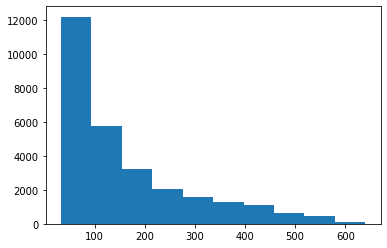

28295


In [11]:
plt.hist(temp)
plt.show()
print(len(temp))

In [12]:
print(len(np.array(temp)[np.array(temp)>50]))

23293


  3%|▎         | 278/11004 [00:00<00:11, 899.12it/s]

(50, 48, 3)


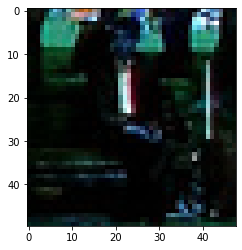

  0%|          | 0/637 [00:00<?, ?it/s]

(50, 49, 3)


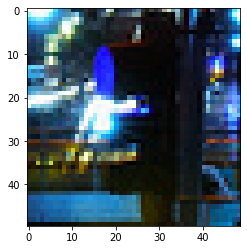

 22%|██▏       | 92/413 [00:00<00:00, 891.03it/s]

(50, 52, 3)


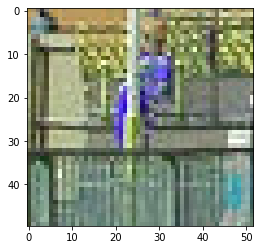

  0%|          | 0/440 [00:00<?, ?it/s]

(50, 48, 3)


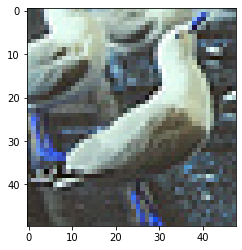

 19%|█▉        | 38/202 [00:00<00:00, 377.39it/s]

(50, 52, 3)


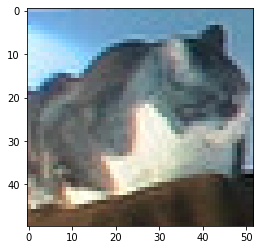

 89%|████████▉ | 244/273 [00:00<00:00, 779.50it/s]

(50, 49, 3)


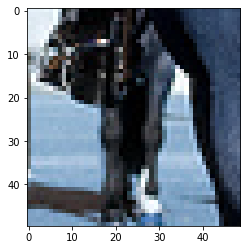

  0%|          | 0/316 [00:00<?, ?it/s]

(50, 49, 3)


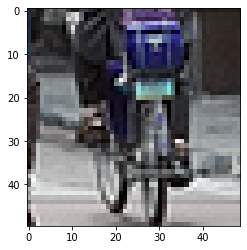

 34%|███▍      | 123/361 [00:00<00:00, 1220.23it/s]

(50, 51, 3)


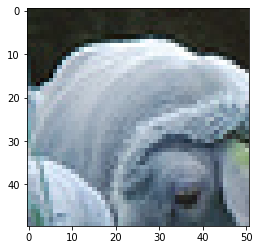

 65%|██████▌   | 247/380 [00:00<00:00, 1172.87it/s]

(50, 49, 3)


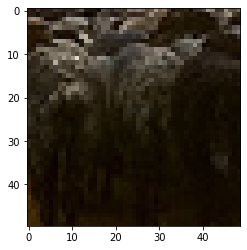

 66%|██████▌   | 168/255 [00:00<00:00, 540.08it/s]

(50, 52, 3)


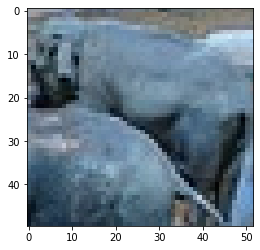

  0%|          | 0/268 [00:00<?, ?it/s]

(50, 50, 3)


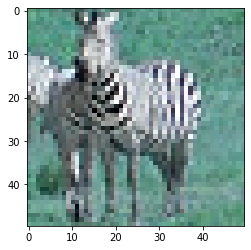

  0%|          | 0/371 [00:00<?, ?it/s]

(50, 48, 3)


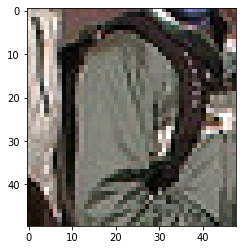

  0%|          | 0/413 [00:00<?, ?it/s]

(50, 49, 3)


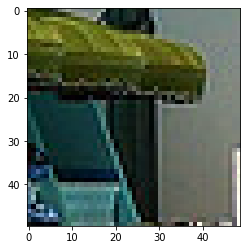

  0%|          | 0/1932 [00:00<?, ?it/s]

(50, 50, 3)


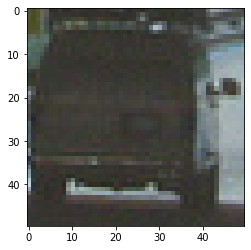

  0%|          | 0/540 [00:00<?, ?it/s]

(50, 48, 3)


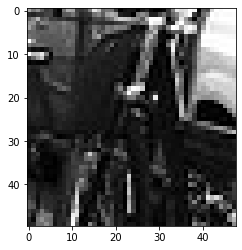

  0%|          | 0/254 [00:00<?, ?it/s]

(50, 49, 3)


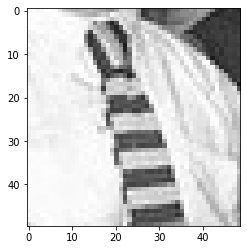

 52%|█████▏    | 158/303 [00:00<00:00, 1559.21it/s]

(50, 51, 3)


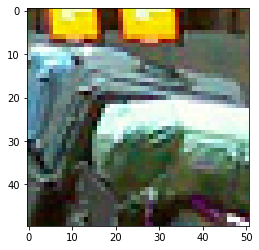

  0%|          | 0/115 [00:00<?, ?it/s]

(50, 52, 3)


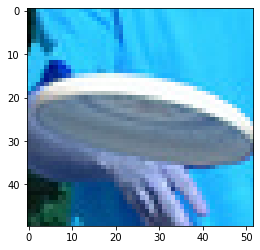

  0%|          | 0/241 [00:00<?, ?it/s]

(50, 52, 3)


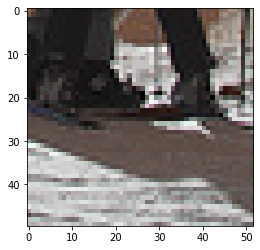

  0%|          | 0/336 [00:00<?, ?it/s]

(50, 49, 3)


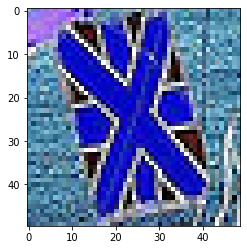

 11%|█         | 40/371 [00:00<00:00, 382.68it/s]

(50, 49, 3)


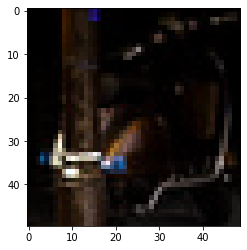

  0%|          | 0/148 [00:00<?, ?it/s]

(50, 52, 3)


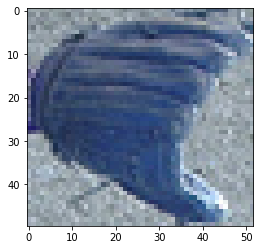

  0%|          | 0/179 [00:00<?, ?it/s]

(50, 51, 3)


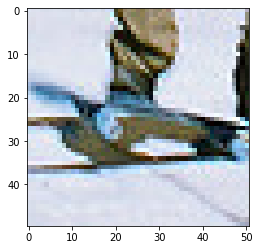

  0%|          | 0/225 [00:00<?, ?it/s]

(50, 50, 3)


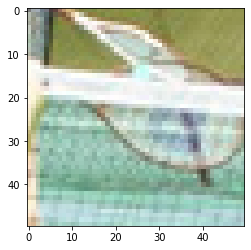

  0%|          | 0/1025 [00:00<?, ?it/s]

(50, 51, 3)


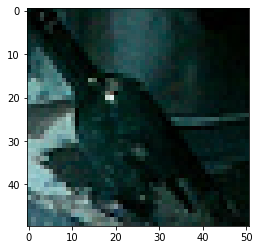

  0%|          | 0/343 [00:00<?, ?it/s]

(50, 48, 3)


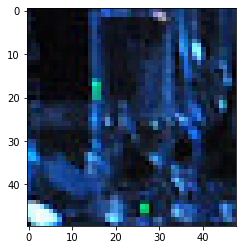

  0%|          | 0/899 [00:00<?, ?it/s]

(50, 50, 3)


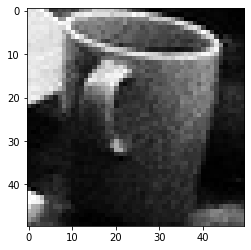

 52%|█████▏    | 111/215 [00:00<00:00, 1091.57it/s]

(50, 50, 3)


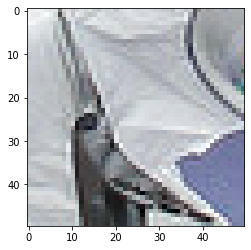

 63%|██████▎   | 204/326 [00:00<00:00, 2037.42it/s]

(50, 51, 3)


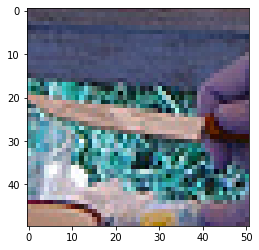

 32%|███▏      | 46/143 [00:00<00:00, 440.55it/s]

(50, 51, 3)


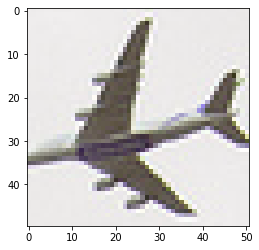

  0%|          | 0/253 [00:00<?, ?it/s]

(50, 50, 3)


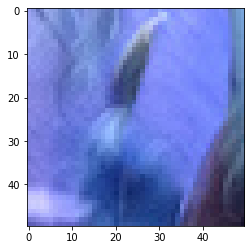

 14%|█▍        | 90/626 [00:00<00:00, 895.96it/s]

(50, 51, 3)


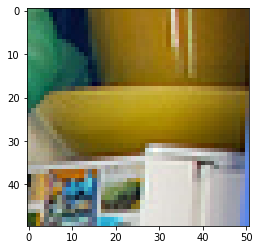

  0%|          | 0/379 [00:00<?, ?it/s]

(50, 49, 3)


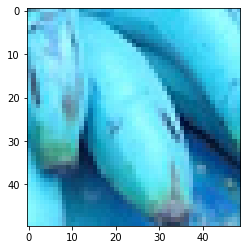

  0%|          | 0/239 [00:00<?, ?it/s]

(50, 50, 3)


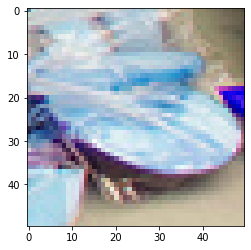

 36%|███▌      | 64/177 [00:00<00:00, 637.25it/s]

(50, 52, 3)


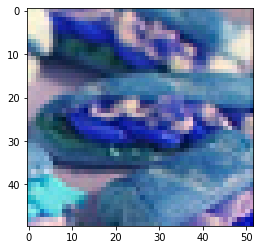

  0%|          | 0/287 [00:00<?, ?it/s]

(50, 50, 3)


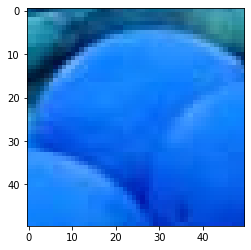

  0%|          | 0/316 [00:00<?, ?it/s]

(50, 51, 3)


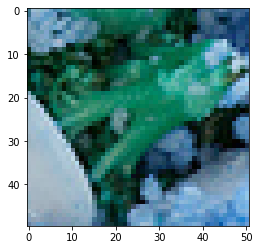

  0%|          | 0/371 [00:00<?, ?it/s]

(50, 52, 3)


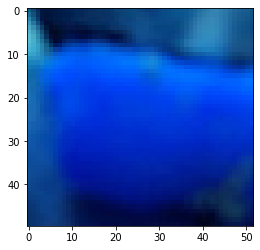

  0%|          | 0/316 [00:00<?, ?it/s]

(50, 51, 3)


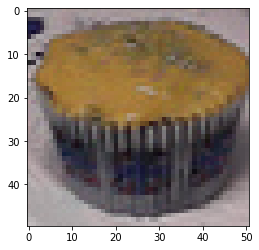

  9%|▉         | 170/1791 [00:00<00:00, 1697.18it/s]

(50, 50, 3)


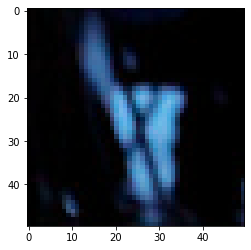

 52%|█████▏    | 177/343 [00:00<00:00, 1679.60it/s]

(50, 52, 3)


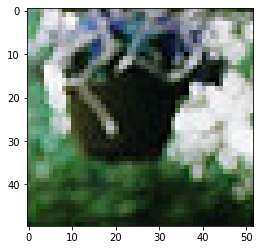

 68%|██████▊   | 477/697 [00:01<00:00, 292.07it/s]

(50, 52, 3)


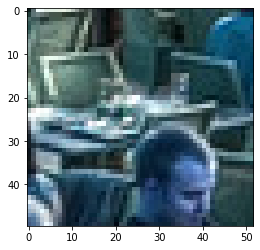

 69%|██████▉   | 131/190 [00:00<00:00, 256.27it/s]

(50, 48, 3)


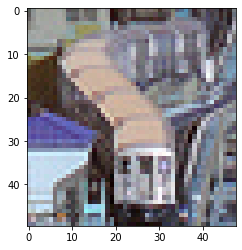

 42%|████▏     | 75/179 [00:00<00:00, 738.57it/s]

(50, 49, 3)


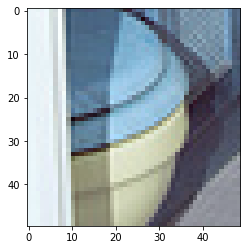

  0%|          | 0/288 [00:00<?, ?it/s]

(50, 51, 3)


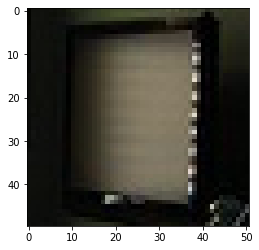

 65%|██████▍   | 149/231 [00:00<00:00, 731.54it/s]

(50, 48, 3)


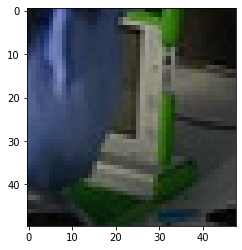

  0%|          | 0/106 [00:00<?, ?it/s]

(50, 52, 3)


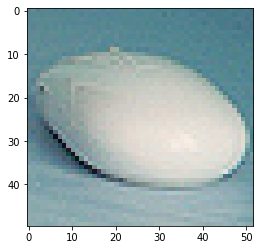

  0%|          | 0/283 [00:00<?, ?it/s]

(50, 51, 3)


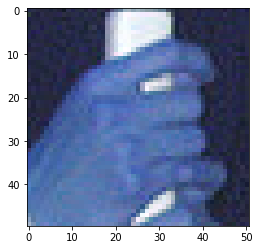

 44%|████▍     | 68/153 [00:00<00:00, 658.80it/s]

(50, 52, 3)


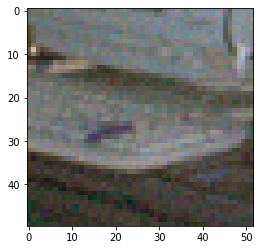

  0%|          | 0/262 [00:00<?, ?it/s]

(50, 51, 3)


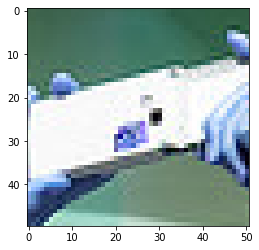

  0%|          | 0/55 [00:00<?, ?it/s]

(50, 50, 3)


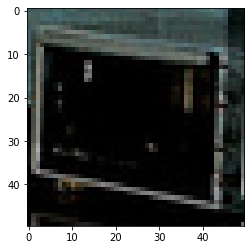

 81%|████████  | 337/415 [00:00<00:00, 812.10it/s]

(50, 50, 3)


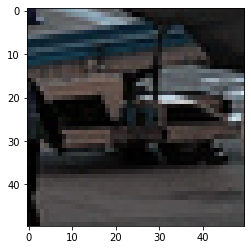

  0%|          | 0/225 [00:00<?, ?it/s]

(50, 52, 3)


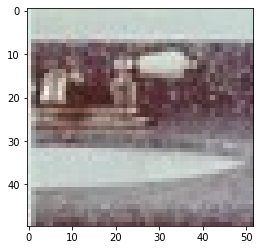

  0%|          | 0/1161 [00:00<?, ?it/s]

(50, 51, 3)


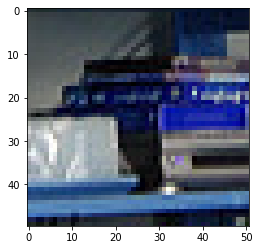

  0%|          | 0/267 [00:00<?, ?it/s]

(50, 51, 3)


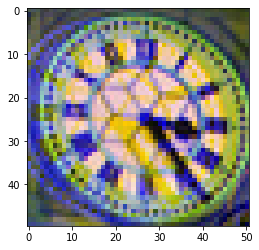

  0%|          | 0/277 [00:00<?, ?it/s]

(50, 50, 3)


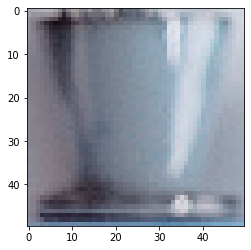

 60%|██████    | 259/430 [00:00<00:00, 1218.26it/s]

(50, 51, 3)


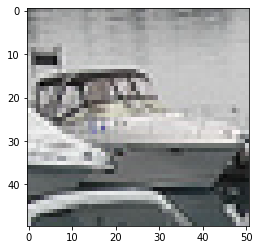

  0%|          | 0/57 [00:00<?, ?it/s]

(50, 48, 3)


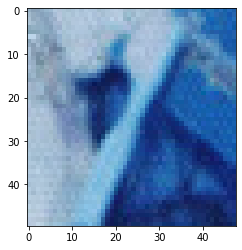

  0%|          | 0/57 [00:00<?, ?it/s]


In [13]:
import cv2
from tqdm import tqdm

path = "cropped_coco/val/100"

for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    for img_file in tqdm(img_list):
        img = cv2.imread(os.path.join(path,class_dir,img_file))
        if img.shape[0] == 50:
            print(img.shape)
            plt.imshow(img)
            plt.show()
            
            break


In [16]:
import cv2
from tqdm import tqdm

path = "cropped_coco/val/100"

num = 0
total = 0
for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    if len(img_list)>100:
        num = num + 1
        total += len(img_list)
print(num)
print(total)

71
36338


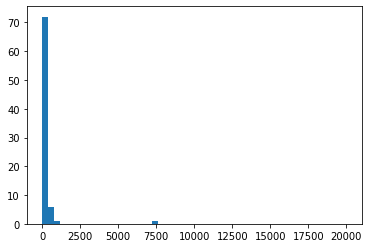

291.1625


In [17]:
temp = []
for i in range(len(img_mean_arr)):
    temp.append(len(np.array(img_mean_arr[i])[np.array(img_mean_arr[i])>50]))

plt.hist(temp,bins=50,range=(0,20000))
plt.show()
print(np.array(temp).mean())

In [19]:
img_size = 50
num_of_img = 100

remain_classes = 0

for i in img_mean_arr:
    dims = np.array(i)
    dims.sort()
    if len(dims[dims>img_size]) > num_of_img:
        remain_classes += 1 
    else:
        print(len(dims[dims>img_size]))

print('remain:',remain_classes,'over:',len(img_mean_arr))


76
43
44
66
46
48
26
39
93
43
94
47
5
29
8
36
remain: 64 over: 80


In [ ]:
import cv2
from tqdm import tqdm
import shutil
import os
import numpy as np

path = "cropped_coco/train/100"
new_path = "sampled_cropped_coco/train"

file_list = os.listdir(path)

img_min = 50
img_num = 3000

for class_dir in file_list:
    img_list = os.listdir(os.path.join(path,class_dir))
    img_list_over_50 = []
    for img_file in tqdm(img_list):
        img = cv2.imread(os.path.join(path,class_dir,img_file))
        if img.shape[0] > img_min:
            img_list_over_50.append(img_file)
    if len(img_list_over_50)>img_num:
        os.mkdir(os.path.join(new_path,'100',class_dir))
        os.mkdir(os.path.join(new_path,'50',class_dir))
        chosen = np.random.choice(img_list_over_50,img_num ,replace=False)
        for chosen_one in tqdm(chosen):
            shutil.copy(os.path.join(path,class_dir,chosen_one),os.path.join(new_path,'100',class_dir))
            shutil.copy(os.path.join('cropped_coco/train/50',class_dir,chosen_one),os.path.join(new_path,'50',class_dir))
    

 74%|███████▍  | 11705/15714 [00:44<00:16, 241.65it/s]